In [1]:
import os.path
import cv2
import stasm
import numpy as np

## PyStasm Tutorial

## Delete later

In [6]:
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(stasm.DATADIR, 'testface.jpg')

In [3]:
path

'/home/shaunak/miniconda2/envs/dip/lib/python3.6/site-packages/stasm/data/testface.jpg'

In [4]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [10]:
landmarks = stasm.search_single(img)

In [12]:
print(landmarks.shape)

(77, 2)


In [13]:
l = stasm.force_points_into_image(landmarks, img)

In [24]:
p_img = img.copy()

In [25]:
for point in l:
    x, y = point
    p_img[round(y)][round(x)] = 255

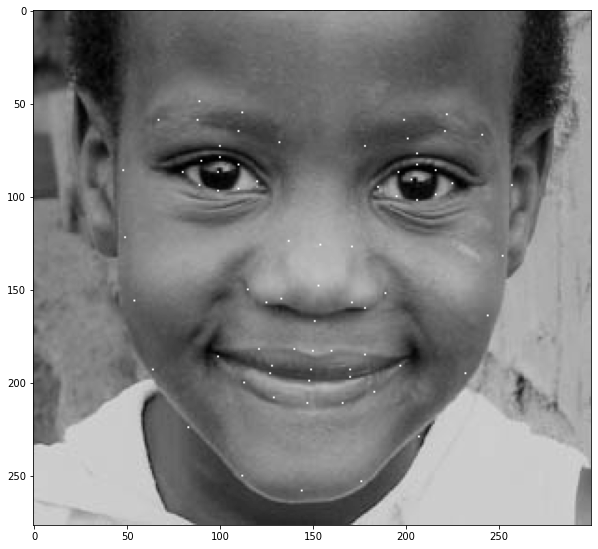

In [27]:
fig = plt.figure(figsize=(10,10))
plt.imshow(p_img, cmap="gray")

## Config for the rest of the notebook

In [2]:
IMAGES_PATH = '../../images/'

## Step 1 : Using PyStasm to generate landmarks in reference and target image

In [7]:
ref = cv2.imread(os.path.join(IMAGES_PATH, 'ref.png'), cv2.IMREAD_GRAYSCALE)

In [8]:
target = cv2.imread(os.path.join(IMAGES_PATH, 'target.png'), cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Target Image')

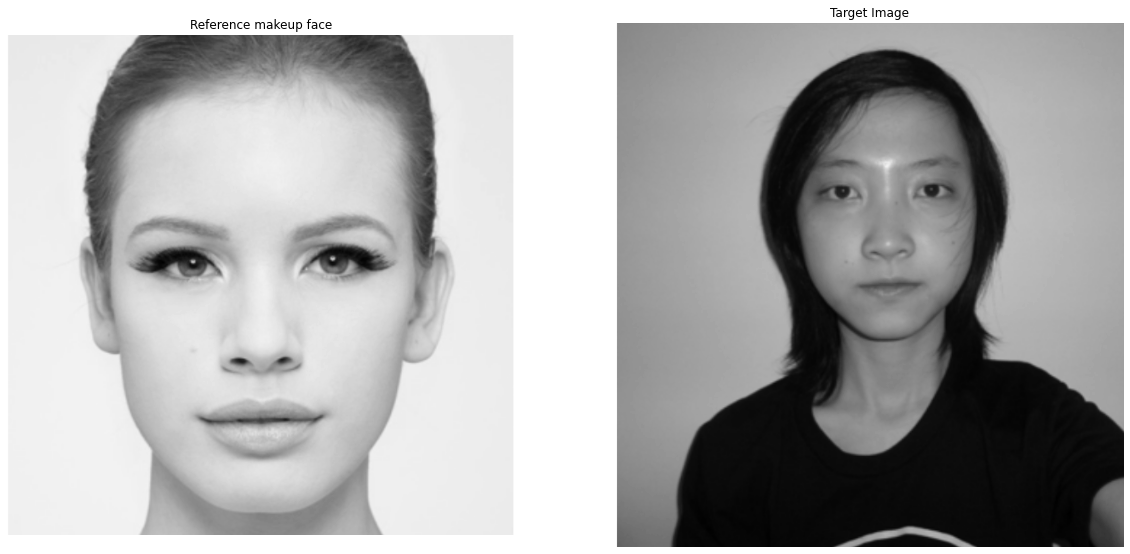

In [9]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(ref, cmap="gray")
plt.axis('off')
plt.title("Reference makeup face")

fig.add_subplot(1, 2, 2)
plt.imshow(target, cmap="gray")
plt.axis('off')
plt.title("Target Image")

In [10]:
ref_landmarks = stasm.search_single(ref)
target_landmarks = stasm.search_single(target)

ref_l = stasm.force_points_into_image(ref_landmarks, ref)
target_l = stasm.force_points_into_image(target_landmarks, target)

In [11]:
## Making landmark points white
ref_copy = ref.copy()
target_copy = target.copy()

for x, y in ref_l:
    ref_copy[round(y)][round(x)] = 0
    ref_copy[round(y) - 1][round(x)] = 0
    ref_copy[round(y) + 1][round(x)] = 0
    
for x, y in target_l:
    target_copy[round(y)][round(x)] = 255

In [12]:
print(ref_l.shape)

(77, 2)


Text(0.5, 1.0, 'Target Landmarks')

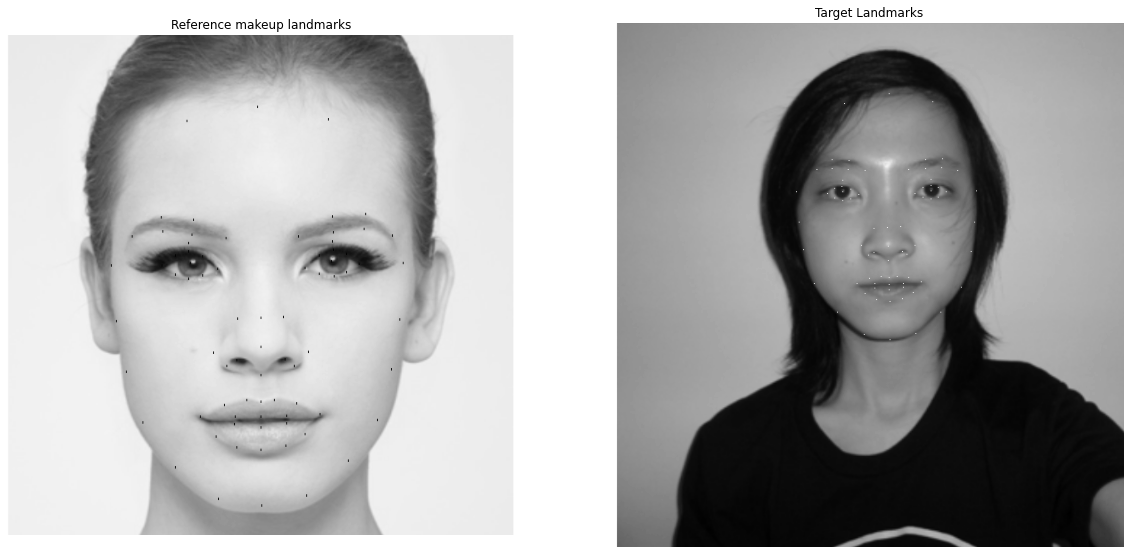

In [13]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(ref_copy, cmap="gray")
plt.axis('off')
plt.title("Reference makeup landmarks")

fig.add_subplot(1, 2, 2)
plt.imshow(target_copy, cmap="gray")
plt.axis('off')
plt.title("Target Landmarks")